In [1]:
pip install nibabel

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import nibabel as nib
import numpy as np
img=nib.load('BraTS20_Training_001_flair.nii')

In [3]:
data=img.get_fdata()
data_array=np.array(data)

In [4]:
print(type(data_array))

<class 'numpy.ndarray'>


In [5]:
hor_cut=data_array[:,:,125]

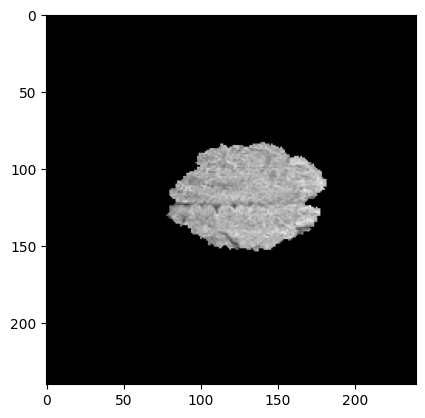

In [6]:
import matplotlib.pyplot as plt
plt.imshow(hor_cut,cmap='gray')
plt.show()

In [7]:
import cv2
import numpy as np

# Assuming you have a numpy array called 'image_array' containing your images

# Determine the dimensions of the images
height, width,time = data_array.shape
print(time)


# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can also use other codecs such as 'XVID', 'MJPG', etc.
fps = 24  # Frames per second
out = cv2.VideoWriter('output_video.mp4', fourcc, fps, (width, height),isColor=False)

# Write each image to the video file
for t in range(time):
    wiw=np.uint8(data_array[:,:,t])
    
    out.write(wiw)
    

# Release the VideoWriter object
out.release()
print("Video created successfully!")


155
Video created successfully!


python version is:  3.11.5 (tags/v3.11.5:cce6ba9, Aug 24 2023, 14:38:34) [MSC v.1936 64 bit (AMD64)]


[[ 0.88333333 -0.21666667]
 [ 1.6         0.5       ]
 [ 0.72037037  0.23148148]
 [ 0.02857143  1.2       ]
 [ 0.93461538  1.08846154]
 [ 0.6         1.2       ]
 [ 2.          1.5       ]
 [ 1.51578947  1.25789474]
 [ 1.31170213  1.3712766 ]
 [-5.25       16.        ]
 [ 1.10384615  1.70384615]]


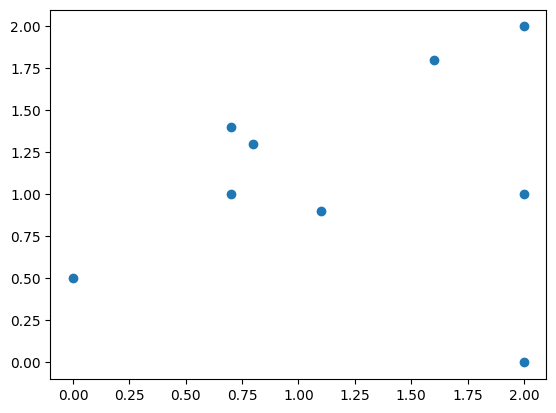

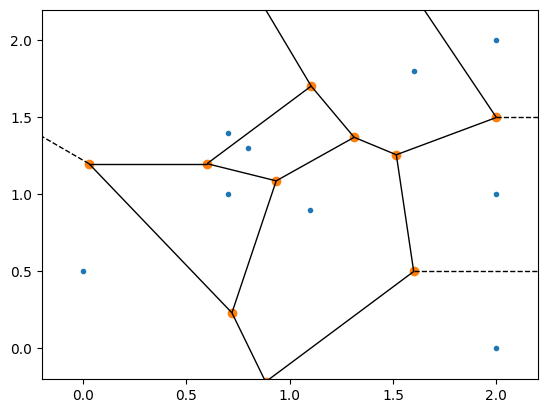

In [8]:
import sys
print("python version is: ", sys.version)

import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib import pyplot as plt

points = np.array([[0, 0.5], [0.7, 1], [0.8, 1.3], [1.1, 0.9], [0.7, 1.4], [1.6, 1.8],
                   [2, 0], [2, 1], [2, 2]])

plt.scatter(points[:,0], points[:,1])

#Create voronoi object
vor = Voronoi(points)

#Get voronoi vertices
vor_vertices = vor.vertices
print(vor_vertices)

#Get voronoi regions


#Use built in function to plot
fig = voronoi_plot_2d(vor)
plt.show()


##########################################


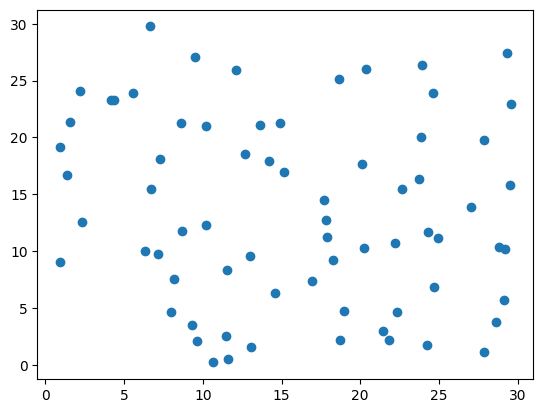

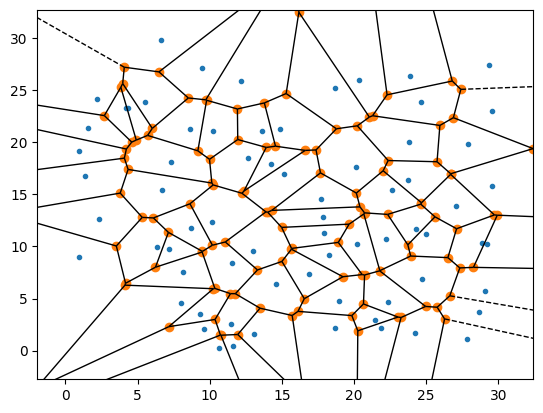

In [9]:
num_points=70
texture_size=30
points = np.random.rand(num_points, 2) * texture_size
vor = Voronoi(points)
plt.scatter(points[:,0], points[:,1])
fig = voronoi_plot_2d(vor)
plt.show()

In [10]:
def get_ridge_coordinates(vor):
    ridge_coords = []
    for i, (point_idx1, point_idx2) in enumerate(vor.ridge_points):
        if point_idx1 != -1 and point_idx2 != -1:  # Check if the ridge is not unbounded
            point1 = vor.vertices[vor.ridge_vertices[i][0]]
            point2 = vor.vertices[vor.ridge_vertices[i][1]]
            ridge_coords.append([point1, point2])
    return ridge_coords
coordinates=get_ridge_coordinates(vor)

In [11]:
# THIS IS UNUSED !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
def find_third_point(point1, point2, xtarget):
    # Calculate slope
    slope = (point2[1] - point1[1]) / (point2[0] - point1[0])
    # Calculate y-intercept
    y_intercept = point1[1] - slope * point1[0]
    # Calculate y-coordinate of the third point
    ytarget = slope * xtarget + y_intercept
    return (xtarget, ytarget)

In [12]:
def specific_gaussian(image):
# Define the region of interest (ROI)
# Example: selecting the top-left quarter of the image
    height, width = image.shape[:2]
    roi = (0, 0, int(width // 3.6), int(height // 3.6))
    mask = np.zeros_like(image[:, :])
    mask[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]] = 255
    blurred_roi = cv2.GaussianBlur(image[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]], (3, 3), 0)

    image_blurred = np.copy(image)
    image_blurred[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]] = blurred_roi
    return image_blurred

In [13]:
image=data_array[:,:,125].astype(np.uint8)
image_bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
print(np.max(image))
print(image.shape)
color = (255, 255, 255)
#values=[]
thickness = 1  # Thickness of the line
for i in range(len(coordinates)):
    pt1=[int(max(coordinates[i][0][0],0)),int(max(coordinates[i][0][1],0))]
    pt2=[int(max(coordinates[i][1][0],0)),int(max(coordinates[i][1][1],0))]
    
    cv2.line(image_bgr, pt1, pt2,color, thickness)

image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image=np.array(image_gray)   

184
(240, 240)


In [14]:
def draw_lines(image,coordinates,color):
    image=image.astype(np.uint8)
    image_bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    color = (color,color,color)
    thickness = 1 # Thickness of the line
    for i in range(len(coordinates)):
        pt1=[int(max(coordinates[i][0][0],0)),int(max(coordinates[i][0][1],0))]
        pt2=[int(max(coordinates[i][1][0],0)),int(max(coordinates[i][1][1],0))]
        #if()
        cv2.line(image_bgr, pt1, pt2,color, thickness)
    image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
    image=np.array(image_gray) 
    return image


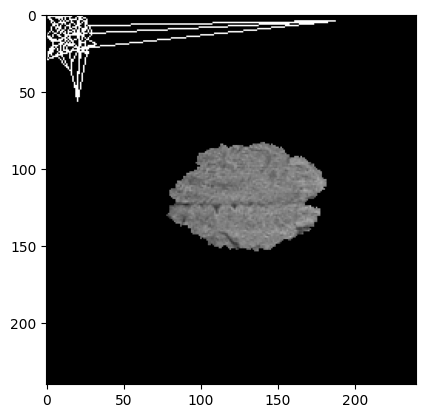

In [15]:
plt.imshow(image,cmap='gray')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

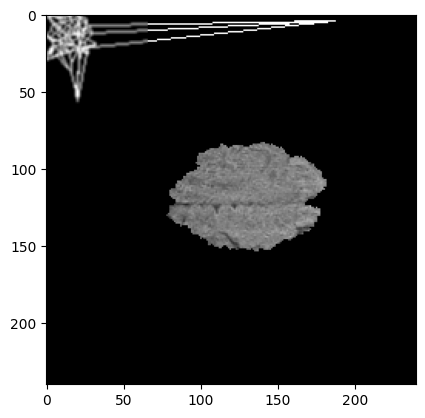

In [16]:
plt.imshow(specific_gaussian(image),cmap='gray')
plt.show

In [17]:

def generate_points(n, xmax, ymax):
    x = np.random.randint(0, xmax, n)
    y = np.random.randint(0, ymax, n)
    return np.column_stack((x, y))


In [18]:
def voronoification(n,data_array,rate=1,Gaussian_bool=False):
    new_data_array=np.zeros(data_array.shape)
    xmax,ymax,time=data_array.shape
    for t in range(time):
        if t%rate==0:
            n=np.random.randint(4,25)
            points=generate_points(n,xmax/5,ymax/5)
            vor = Voronoi(points)
            coordinates=get_ridge_coordinates(vor)
            color=np.random.randint(35,255)
        new_image=draw_lines(data_array[:,:,t],coordinates,color)
        if Gaussian_bool:
            new_image=specific_gaussian(new_image)
        new_data_array[:,:,t]=new_image
    return new_data_array
    

In [19]:
voronoid_data=voronoification(8,data_array,5,True)


In [20]:
# Determine the dimensions of the images
def video_maker(name,data_array):
    height, width,time = data_array.shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    fps = 24  # Frames per second
    out = cv2.VideoWriter("video/"+name+".mp4", fourcc, fps, (width, height),isColor=False)

# Write each image to the video file
    for t in range(time):
        wiw=np.uint8(data_array[:,:,t])
        out.write(wiw)
    out.release()
    print("Video created successfully!")

In [21]:
video_maker("weird_voronoi_square_fast_gaussian",voronoid_data)

Video created successfully!


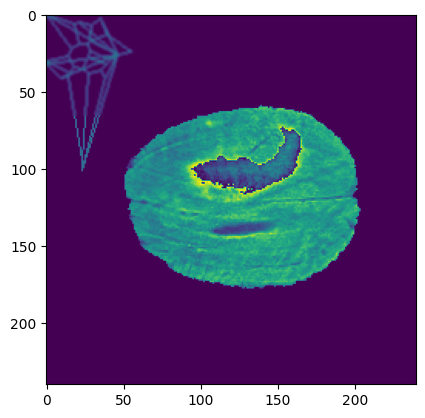

In [22]:
plt.imshow(voronoid_data[:,:,100])
plt.show()

In [23]:
import nibabel as nib
import numpy as np

# Assuming you have modified data_array extensively

# Create a new NIfTI image from the modified data array
new_img = nib.Nifti1Image(voronoid_data, img.affine)

# Save the new NIfTI image to a file
nib.save(new_img, 'voronoid_data.nii')